In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width:50% !important; height:70% !important;}</style>"
HTML(style)

In [4]:
df = pd.read_csv("C:/Users/Asus/Desktop/NEURAL_NETWORKS/Specification/SolvingTrees/dogs_n_cats.csv")

In [114]:
data = pd.read_json("C:/Users/Asus/Desktop/NEURAL_NETWORKS/Specification/SolvingTrees/test.txt")

In [115]:
data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,26,31.2,1,0,0
1,34,40.8,1,1,0
2,29,34.8,1,1,0
3,25,30.0,1,1,0
4,21,25.2,1,1,0
...,...,...,...,...,...
95,8,3.2,1,0,1
96,10,4.0,1,0,1
97,9,3.6,1,0,1
98,6,2.4,1,0,1


In [5]:
df

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [6]:
df.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [8]:
X = df.drop(['Вид'],axis =1)

In [9]:
X

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0
...,...,...,...,...,...
995,8,3.2,1,0,1
996,7,2.8,1,0,1
997,6,2.4,1,0,1
998,7,2.8,1,0,1


In [109]:
y = df.Вид

In [110]:
y

0      собачка
1      собачка
2      собачка
3      собачка
4      собачка
        ...   
995      котик
996      котик
997      котик
998      котик
999      котик
Name: Вид, Length: 1000, dtype: object

In [108]:
y = pd.get_dummies(y)
y = y.rename(columns = 
            {'котик' : 'cat',
            'собачка' : 'dog'})

In [101]:
y

,cat,dog
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
995,1,0
996,1,0
997,1,0
998,1,0


,animal,type
500,cat,1
501,cat,1
502,cat,1
503,cat,1
504,cat,1
...,...,...
1495,dog,1
1496,dog,1
1497,dog,1
1498,dog,1


In [69]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [70]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

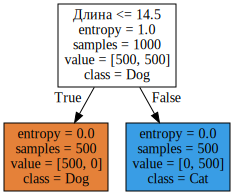

In [71]:
graph = Source(tree.export_graphviz(
                clf, out_file = None,
                feature_names = list(X), class_names = ['Dog', 'Cat'],
                filled = True))
display(SVG(graph.pipe(format = 'svg')))

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [73]:
X_train.shape

(670, 5)

In [74]:
y_test.shape

(330,)

In [75]:
max_depth_values = range(1,1000)

In [77]:
scores_data = pd.DataFrame()

In [78]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score' : [train_score],
                                    'test_score' : [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [79]:
scores_data_long = scores_data
scores_data_long

,max_depth,train_score,test_score
0,1,1.0,1.0
0,2,1.0,1.0
0,3,1.0,1.0
0,4,1.0,1.0
0,5,1.0,1.0
...,...,...,...
0,995,1.0,1.0
0,996,1.0,1.0
0,997,1.0,1.0
0,998,1.0,1.0


In [80]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score','test_score'], var_name = 'set_type', value_name = 'score')

In [81]:
scores_data_long.sort_values('score')

,max_depth,set_type,score
0,1,train_score,1.0
1339,341,test_score,1.0
1338,340,test_score,1.0
1337,339,test_score,1.0
1336,338,test_score,1.0
...,...,...,...
659,660,train_score,1.0
658,659,train_score,1.0
657,658,train_score,1.0
670,671,train_score,1.0


In [82]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
cross_val_score(best_clf, X_test, y_test, cv = 5).mean()

1.0

In [85]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
best_score = best_clf.score(X_test, y_test)

In [87]:
best_score

1.0

In [88]:
X.shape

(1000, 5)

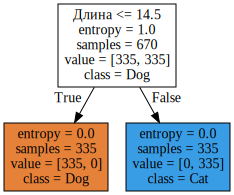

In [89]:
graph = Source(tree.export_graphviz(
                best_clf, out_file = None,
                feature_names = list(X), class_names = ['Dog', 'Cat'],
                filled = True))
display(SVG(graph.pipe(format = 'svg')))

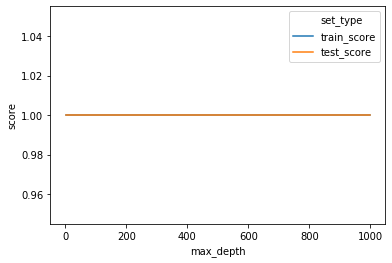

In [112]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [119]:
results = best_clf.predict(data)

In [136]:
results

array(['собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', '

In [140]:
cnt = 0
for i in range(len(results)):
    if results[i] == 'собачка':
        cnt = cnt + 1
        

In [141]:
cnt

50